# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [1]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size.


####

In [2]:
from queue import PriorityQueue

class Node:
    """
    A class to represent a node in the Huffman tree.

    Attributes:
    -----------
    symbol : str or None
        The symbol (character or string) the node represents. None for internal nodes.
    freq : float
        The frequency or probability associated with the node.
    left : Node or None
        Left child node (represents '0' in Huffman coding).
    right : Node or None
        Right child node (represents '1' in Huffman coding).
    """

    def __init__(self, symbol=None, freq=0):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        # Defines less-than for PriorityQueue to compare nodes by frequency
        return self.freq < other.freq

def build_huffman_tree(prob_dict):
    """
    Build a Huffman tree using a priority queue to combine nodes efficiently.

    Parameters:
    -----------
    prob_dict : dict
        A dictionary with symbols as keys and their probabilities as float values.

    Returns:
    --------
    Node
        The root node of the constructed Huffman tree.
    """

    pq = PriorityQueue()

    # Add all nodes to the priority queue
    for symbol, freq in prob_dict.items():
        pq.put(Node(symbol, freq))

    # Merge nodes until only one tree remains
    while pq.qsize() > 1:
        left = pq.get()
        right = pq.get()

        merged = Node(freq=left.freq + right.freq)
        merged.left = left
        merged.right = right

        pq.put(merged)

    return pq.get()  # Root node of the tree

def generate_huffman_codes(node, current_code='', codes=None):
    """
    Generate Huffman codes by traversing the Huffman tree recursively.

    Parameters:
    -----------
    node : Node
        Current node in the Huffman tree.
    current_code : str
        The binary code constructed so far during the traversal.
    codes : dict or None
        Dictionary to store the symbol-to-codeword mapping.

    Returns:
    --------
    dict
        Dictionary mapping each symbol to its corresponding Huffman code.
    """

    if codes is None:
        codes = {}
    if node is None:
        return codes
    if node.symbol is not None:
        codes[node.symbol] = current_code
        return codes

    # Traverse left with '0' and right with '1'
    generate_huffman_codes(node.left, current_code + '0', codes)
    generate_huffman_codes(node.right, current_code + '1', codes)
    return codes

def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities

    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}

    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword
      - keys: symbol as character or string
      - values: associated codeword as a character or a string
      Example: {"A": "10", "B":"0","C":"111","D":"110"}

    """

    root = build_huffman_tree(probability_dict)
    return generate_huffman_codes(root)

def print_huffman_tree(node, indent="", label=" "):
    """
    Recursively prints the structure of a binary Huffman tree in a readable format.

    Parameters:
    -----------
    node : Node
        The current node in the Huffman tree.
    indent : str
        A string used to visually indent child nodes (default: "").
    label : str
        A label for the current branch ("0" for left, "1" for right, or " " for root).

    Behavior:
    ---------
    - If the node is a leaf, it prints the symbol and its probability.
    - If the node is internal, it prints a placeholder and its combined probability.
    - Recursively traverses and prints the left and right children with increased indentation.
    """

    if node is None:
        return

    if node.symbol is not None:
        print(f"{indent}[{label}] P = {node.freq:.2f} | {node.symbol}")
    else:
        print(f"{indent}[{label}] P = {node.freq:.2f} | ...")

    print_huffman_tree(node.left, indent + "    ", label="0")
    print_huffman_tree(node.right, indent + "    ", label="1")

# Exercise 5 of TP2
P = [0.05, 0.10, 0.15, 0.15, 0.2, 0.35]
symbols = ["A", "B", "C", "D", "E", "F"]
prob_dict = dict(zip(symbols, P))

codebook = Huffman_code(prob_dict)
print(f"Huffman codebook: {codebook}")

print("Huffman tree:")
print_huffman_tree(build_huffman_tree(prob_dict))


Huffman codebook: {'A': '000', 'B': '001', 'E': '01', 'C': '100', 'D': '101', 'F': '11'}
Huffman tree:
[ ] P = 1.00 | ...
    [0] P = 0.35 | ...
        [0] P = 0.15 | ...
            [0] P = 0.05 | A
            [1] P = 0.10 | B
        [1] P = 0.20 | E
    [1] P = 0.65 | ...
        [0] P = 0.30 | ...
            [0] P = 0.15 | C
            [1] P = 0.15 | D
        [1] P = 0.35 | F


In [2]:
from queue import PriorityQueue

class Node:
    def __init__(self, symbol=None, freq=0):
        self.symbol = symbol
        self.freq = freq
        self.children = []  # Generalized to support multiple children

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(prob_dict, arity=2):
    """
    Build a generalized n-ary Huffman tree.

    Parameters:
    -----------
    prob_dict : dict
        A dictionary with symbols as keys and their probabilities as values.
    arity : int
        The arity of the Huffman tree (number of children per internal node).

    Returns:
    --------
    Node
        The root node of the Huffman tree.
    """

    pq = PriorityQueue()
    for symbol, freq in prob_dict.items():
        pq.put(Node(symbol, freq))

    # Add dummy nodes with 0 probability if needed
    dummy_counter = 0
    while (pq.qsize() - 1) % (arity - 1) != 0:
        dummy_symbol = f"_dummy_{dummy_counter}"
        pq.put(Node(symbol=dummy_symbol, freq=0.0))
        dummy_counter += 1

    # Build the n-ary Huffman tree
    while pq.qsize() > 1:
        nodes = [pq.get() for _ in range(arity)]
        merged_freq = sum(n.freq for n in nodes)
        merged_node = Node(freq=merged_freq)
        merged_node.children.extend(nodes)
        pq.put(merged_node)

    return pq.get()

def generate_huffman_codes(node, current_code='', codes=None, arity=2):
    """
    Recursively generate Huffman codes from an n-ary Huffman tree.

    Parameters:
    -----------
    node : Node
        The current node.
    current_code : str
        The current code prefix.
    codes : dict
        The dictionary to store symbol-to-code mappings.
    arity : int
        The number of children per node.

    Returns:
    --------
    dict
        Symbol to codeword mapping.
    """

    if codes is None:
        codes = {}
    if node is None:
        return codes

    # Add only non-dummy symbols to codebook
    if node.symbol is not None and not node.symbol.startswith("_dummy_"):
        codes[node.symbol] = current_code
        return codes

    for idx, child in enumerate(node.children):
        generate_huffman_codes(child, current_code + str(idx), codes, arity)
    return codes

def print_huffman_tree(node, indent="", label=" "):
    """
    Recursively print the structure of a D-ary Huffman tree.

    Parameters:
    -----------
    node : DaryNode
        The current node to print.
    indent : str
        Indentation string used for formatting.
    label : str
        Label to show the branch index (e.g., 0, 1, 2...).
    """

    if node is None:
        return

    if node.symbol is not None and not node.symbol.startswith("_dummy_"):
        print(f"{indent}[{label}] {node.symbol} | P = {node.freq:.4f}")
    else:
        if node.freq == 0:
            print(f"{indent}[{label}] dummy | P = {node.freq:.4f}")
        else:
            print(f"{indent}[{label}] ... | P = {node.freq:.4f}")

    for i, child in enumerate(node.children):
        print_huffman_tree(child, indent + "    ", label=str(i))

def Huffman_code(probability_dict, D=2):
    """
    Generate a D-ary Huffman codebook for the given symbol probabilities.

    Parameters:
    -----------
    probability_dict : dict
        Keys: symbols (as strings)
        Values: probabilities (as floats)
    D : int
        Output alphabet size (D >= 2)

    Returns:
    --------
    dict
        Symbol-to-codeword mapping
    """

    root = build_huffman_tree(probability_dict, D)
    return generate_huffman_codes(root, current_code='', arity=D)

# Example usage
P = [0.05, 0.10, 0.15, 0.15, 0.2, 0.35]
symbols = ["A", "B", "C", "D", "E", "F"]
prob_dict = dict(zip(symbols, P))

arity = 2  # Set desired arity here
codebook = Huffman_code(prob_dict, arity)
print(f"Huffman codebook (arity={arity}): {codebook}")

print("Huffman tree:")
print_huffman_tree(build_huffman_tree(prob_dict, arity))
print("\n")

# Example usage
P = [0.05, 0.10, 0.15, 0.15, 0.2, 0.35]
symbols = ["A", "B", "C", "D", "E", "F"]
prob_dict = dict(zip(symbols, P))

arity = 3  # Set desired arity here
codebook = Huffman_code(prob_dict, arity)
print(f"Huffman codebook (arity={arity}): {codebook}")

print("Huffman tree:")
print_huffman_tree(build_huffman_tree(prob_dict, arity))
print("\n")

# Example usage
P = [0.05, 0.10, 0.15, 0.15, 0.2, 0.35]
symbols = ["A", "B", "C", "D", "E", "F"]
prob_dict = dict(zip(symbols, P))

arity = 4  # Set desired arity here
codebook = Huffman_code(prob_dict, arity)
print(f"Huffman codebook (arity={arity}): {codebook}")

print("Huffman tree:")
print_huffman_tree(build_huffman_tree(prob_dict, arity))

Huffman codebook (arity=2): {'A': '000', 'B': '001', 'E': '01', 'C': '100', 'D': '101', 'F': '11'}
Huffman tree:
[ ] ... | P = 1.0000
    [0] ... | P = 0.3500
        [0] ... | P = 0.1500
            [0] A | P = 0.0500
            [1] B | P = 0.1000
        [1] E | P = 0.2000
    [1] ... | P = 0.6500
        [0] ... | P = 0.3000
            [0] C | P = 0.1500
            [1] D | P = 0.1500
        [1] F | P = 0.3500


Huffman codebook (arity=3): {'E': '0', 'F': '1', 'C': '20', 'D': '21', 'A': '221', 'B': '222'}
Huffman tree:
[ ] ... | P = 1.0000
    [0] E | P = 0.2000
    [1] F | P = 0.3500
    [2] ... | P = 0.4500
        [0] C | P = 0.1500
        [1] D | P = 0.1500
        [2] ... | P = 0.1500
            [0] dummy | P = 0.0000
            [1] A | P = 0.0500
            [2] B | P = 0.1000


Huffman codebook (arity=4): {'D': '0', 'E': '1', 'A': '21', 'B': '22', 'C': '23', 'F': '3'}
Huffman tree:
[ ] ... | P = 1.0000
    [0] D | P = 0.1500
    [1] E | P = 0.2000
    [2] ... | P = 0.30

### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course.

In [4]:
def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format

    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """

    dictionary = {'': (0, '')}
    encoded_sequence = ''

    source_word = ''
    for word in sequence:
        source_word += word
        if source_word not in dictionary:
            index = len(dictionary)
            prefix = source_word[:-1]
            last_symbol = source_word[-1]

            address_int = dictionary[prefix][0]
            no_of_bits = int(np.ceil(np.log2(index)))

            # Calculate the binary representation of the address
            if no_of_bits > 0:
                address_bin = np.binary_repr(address_int, width=no_of_bits)
            else:
                address_bin = ''
            encoded_text = address_bin + last_symbol


            dictionary[source_word] = (index, encoded_text)
            encoded_sequence += encoded_text

            source_word = ''
    return dictionary, encoded_sequence

sequence = "1011010100010"
dictionary, encoded_sequence = LZ_online(sequence)

print(f"Source sequence: {sequence}")
print(f"Encoded sequence: {encoded_sequence}")
print("Dictionary:")
for key, value in dictionary.items():
    print(f"Word = {key} \t Index = {value[0]} \t Encoded = {value[1]}")

Source sequence: 1011010100010
Encoded sequence: 100011101100001000010
Dictionary:
Word =  	 Index = 0 	 Encoded = 
Word = 1 	 Index = 1 	 Encoded = 1
Word = 0 	 Index = 2 	 Encoded = 00
Word = 11 	 Index = 3 	 Encoded = 011
Word = 01 	 Index = 4 	 Encoded = 101
Word = 010 	 Index = 5 	 Encoded = 1000
Word = 00 	 Index = 6 	 Encoded = 0100
Word = 10 	 Index = 7 	 Encoded = 0010


### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [5]:
def find_longest_prefix(window, remaining):
    """
    Find the longest prefix between window + remaining and remaining.
    The prefix is guaranteed to start in window.

    Arguments:
    ----------
    - window
    - remaining

    Return:
    -------
    - match_a: tuple of the start and end index of the match in window + remaining
    - match_b: tuple of the start and end index of the match in remaining
    If no match is found, return (i, i) for match_a and (0, 0) for match_b.
    """

    window_and_remaining = window + remaining
    window_size = len(window)

    if len(remaining) == 0:
        raise ValueError("remaining length must be greater than 0")

    if window_size == 0:
        return (0, 0), (0, 0)

    max_match_length = 0
    max_match_a = (0, 0)
    max_match_b = (0, 0)

    for i in range(window_size):
        match_length = 0
        for j in range(len(remaining)):
            if window_and_remaining[i + j] == remaining[j]:
                match_length += 1
            else:
                break
        if match_length >= max_match_length:
            max_match_length = match_length
            max_match_a = (i, i + match_length)
            max_match_b = (0, match_length)

    return max_match_a, max_match_b

def LZ77_as_list(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size

    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer

    Return:
    -------
    - encoded_sequence : the encoded sequence in the list format
    """

    encoded_sequence_as_list = []
    window_start = -window_size # Position of the fist element of the window
    window_end = window_start + window_size # Position of the last element of the window

    while window_end < len(sequence):
        if window_start < 0:
            window = sequence[:window_end]
        else:
            window = sequence[window_start:window_end]

        lookahead = sequence[window_end:]


        # Find the longest common prefix between the window and the remaining string
        (start_match_window, end_match_window), (start_match_remaining, end_match_lookahead) = \
            find_longest_prefix(window, lookahead)

        # If the match spans the entire lookahead, reduce by 1 to preserve a non-empty final symbol (c)
        if end_match_lookahead == len(lookahead):
            end_match_window -= 1
            end_match_lookahead -= 1

        # If no match or match cancelled by the previous if condition
        if start_match_window == end_match_window:
            d = 0
            p = 0
            c = lookahead[0]
        # If match found
        else:
            d = len(window) - start_match_window
            p = end_match_lookahead
            c = lookahead[end_match_lookahead]

        # Append the encoded sequence
        encoded_sequence_as_list.append((d, p, c))
        # Move the window to the right
        window_start += p + 1
        window_end += p + 1
        
    return encoded_sequence_as_list

def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size

    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer

    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """

    encoded_sequence_as_list = LZ77_as_list(sequence, window_size)

    # Convert to string format
    encoded_sequence = ''.join(f"({d},{p},{c})" for d, p, c in encoded_sequence_as_list)

    return encoded_sequence

sequence = "abracadabrad"
encoded_sequence = LZ77("abracadabrad", 7)

print(f"Source sequence: {sequence}")
print(f"Encoded sequence: {encoded_sequence}")

Source sequence: abracadabrad
Encoded sequence: (0,0,a)(0,0,b)(0,0,r)(3,1,c)(2,1,d)(7,4,d)


In [6]:
# [Locked Cell] Evaluation of your functions by the examiner.
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


### Question 5

In [7]:
text = 'english_text.txt'
with open(text, 'r') as file:
    text = file.read()
    
text

'in the years that followed he became known as the most famous detective in the world his methods were as unorthodox as they were successful and his name was spoken with reverence by those who had been his clients and with dread by those who had been his enemies he was a man of extraordinary abilities whose mind seemed to be a perfect instrument for the solving of the most difficult and intricate problems that came before him his name was sherlock holmes and his fame was to grow to such an extent that it reached every corner of the globe and people from every walk of life sought his aid in solving the mysteries that perplexed them i first met holmes when i was looking for a place to stay in london i had come to the city to work as a doctor after completing my studies in the country and had been living in a small room at a boarding house but the place was not suitable for my needs and i was looking for a more comfortable and permanent home it was at this time that i met a man who would 

In [8]:
# Estimating the marginal probability of a symbol in the text
def estimate_marginal_probability(text):
    """
    Estimate the marginal probability of each symbol in the text.

    Arguments:
    ----------
    - text: The input text as a string

    Return:
    -------
    - probability_dict: A dictionary with symbols as keys and their estimated probabilities as values
    """
    
    # Count the occurrences of each symbol in the text
    symbol_counts = {}
    for symbol in text:
        if symbol in symbol_counts:
            symbol_counts[symbol] += 1
        else:
            symbol_counts[symbol] = 1
    
    # Calculate the total number of symbols
    total_symbols = len(text)
    
    # Calculate the probabilities
    probability_dict = {symbol: count / total_symbols for symbol, count in symbol_counts.items()}
    
    return probability_dict

# Usage
probability_dict = estimate_marginal_probability(text)

probability_dict, len(probability_dict)

({'i': 0.04898022249690977,
  'n': 0.054164949869523416,
  ' ': 0.1908220024721879,
  't': 0.07062903447328664,
  'h': 0.05711784095591265,
  'e': 0.10779769262463947,
  'y': 0.015279494574921027,
  'a': 0.06456874055761572,
  'r': 0.048911550611179785,
  's': 0.05318637549787117,
  'f': 0.017030627661035573,
  'o': 0.059864716385111934,
  'l': 0.03426727097926109,
  'w': 0.020790413404752094,
  'd': 0.043520807581376185,
  'b': 0.013356681774481528,
  'c': 0.017167971432495537,
  'm': 0.018644416975690154,
  'k': 0.007811427001785469,
  'u': 0.019485647575882434,
  'v': 0.007502403516000549,
  'x': 0.0006180469715698393,
  'p': 0.009991759373712402,
  'g': 0.01553701414640846,
  'j': 0.0018369729432770223,
  'z': 0.0004978711715423706,
  'q': 0.0006180469715698393},
 27)

In [9]:
# Binary huffman code
huffman_code = Huffman_code(probability_dict)

huffman_code

{'d': '0000',
 'r': '0001',
 'i': '0010',
 's': '0011',
 'e': '010',
 'n': '0110',
 'q': '011100000',
 'z': '0111000010',
 'x': '0111000011',
 'j': '01110001',
 'v': '0111001',
 'b': '011101',
 'y': '011110',
 'g': '011111',
 'h': '1000',
 'o': '1001',
 'a': '1010',
 'f': '101100',
 'c': '101101',
 'l': '10111',
 't': '1100',
 'k': '1101000',
 'p': '1101001',
 'm': '110101',
 'u': '110110',
 'w': '110111',
 ' ': '111'}

In [33]:
def compute_compression_rate(original_size, encoded_size, original_alphabet_size, encoded_alphabet_size):
    return (original_size / encoded_size) * (np.log2(original_alphabet_size) / np.log2(encoded_alphabet_size))

# Encoded text and compression rate
def encode_text(text, huffman_code):
    """
    Encode the text using the Huffman code and calculate the compression rate.

    Arguments:
    ----------
    - text: The input text as a string
    - huffman_code: A dictionary with symbols as keys and their Huffman codes as values

    Return:
    -------
    - encoded_text: The encoded text as a string of 0 and 1
    - compression_rate: The compression rate as a percentage
    """
    
    # Encode text using the Huffman code
    encoded_text = ''.join([huffman_code[symbol] for symbol in text])
    
    # Calculate the compression rate
    original_size = len(text)
    original_alphabet_size = len(huffman_code)
    
    encoded_size = len(encoded_text)
    encoded_alphabet_size = 2
    
    compression_rate = compute_compression_rate(original_size, encoded_size, original_alphabet_size, encoded_alphabet_size)
    
    return encoded_text, compression_rate

# Usage
encoded_text, compression_rate = encode_text(text, huffman_code)

print("Encoded text: ", encoded_text)
print("Length of encoded text: ", len(encoded_text))
print("Compression rate: ", compression_rate)

Encoded text:  0010011011111001000010111011110010101000010011111110010001010110011110110010011011110111100111011101000001111000010111011101010101101101011010101011111010000110100111011101101111010001111111001000010111110101100100111100111101100101011010110011101100011111000001011000101011011100001001110010101110010011011111001000010111110111100100011011100001111000001000111111101010101100100010010000001111111011101000010101111010001111111011001101001000111001000100100001001011100001111110100011111110010000100111101111101110100001010111001111011010110110110101000110011101100110110101111111010011000001111000001000111110110101011010101011111011110100011111001111010011001110100001001101111101110010110010001110001010011100101000010100110101101010111011101011110111110010001001001101011111011110001001111100010100000111011101010010011011110000010001111110110110111001001001101100001111110100110000011111011100101100100011100000001010101000001110111010111101111100100010010011010111110111100010011

### Question 6

In [34]:
# Theoritical average length
theorical_average_length = sum([len(huffman_code[symbol]) * prob for symbol, prob in probability_dict.items()])

print("Theoritical average length: ", theorical_average_length)

Theoritical average length:  4.103282516137893


In [35]:
empirical_average_length = len(encoded_text) / len(text)

print(f"Empirical Average length: {empirical_average_length}")

Empirical Average length: 4.103282516137893


In [13]:
from IPython.display import display, Math

def entropy(Px):
    """
    Computes the entropy from the marginal probability distribution.
    Arguments:
    ----------
    - Px :  Marginal probability distribution of the random
            variable X in a numpy array where Px[i]=P(X=i)
    Return:
    -------
    - The entropy of X (H(X)) as a number (integer, float or double).
    """
    return -np.sum(Px * np.log2(Px), where=(Px > 0)) # H(X) = -sum(P(Xi) * log2(P(Xi)))

# Lower bound of optimal code
size_of_code_alphabet = 2
source_entropy = entropy(np.array(list(probability_dict.values())))

# Lower bound of optimal code
lower_bound = source_entropy / np.log2(size_of_code_alphabet)

# Upper bound of optimal code
upper_bound = lower_bound + 1

display(Math("\\frac{H(S)}{\\log_2q} \\leq \\mu_E < \\frac{H(S)}{\\log_2q} + 1"))
display(Math(f"{lower_bound} \\leq {theorical_average_length} < {upper_bound}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Question 7

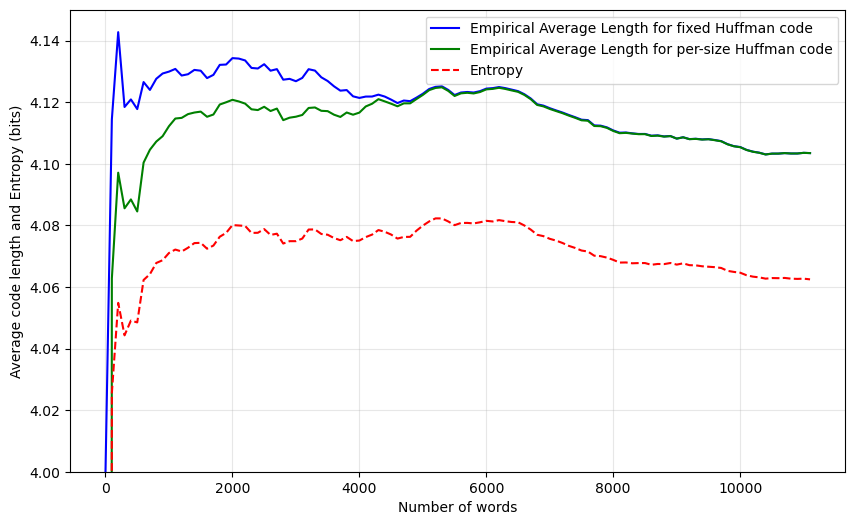

In [14]:
import matplotlib.pyplot as plt

# List of words in the text
words_of_text = text.split()
# Number of words in the text
nb_words_of_text = len(words_of_text)
# Number of points in the plot
number_of_texts = 100
# Number of words per point in the plot
number_of_words_per_text = np.arange(1, nb_words_of_text, number_of_texts)

texts = list(map(lambda nb_words: ' '.join(words_of_text[:nb_words]), number_of_words_per_text))
# Huffman code optimized for text subparts
huffman_per_text = list(map(lambda text: Huffman_code(estimate_marginal_probability(text)), texts))
# Encoded texts using the Huffman code optimized for the whole text
encoded_texts_fixed_huffman = list(map(lambda text: encode_text(text, huffman_code)[0], texts))
# Encoded texts using the Huffman code optimized for each text subpart
encoded_texts_different_huffman = list(map(lambda param: encode_text(param[0], param[1])[0],\
    zip(texts, huffman_per_text)))

# Empirical average lengths for the two cases
empirical_average_lengths_fixed_huffman = [len(encoded_text) / len(text) for encoded_text, text in\
    zip(encoded_texts_fixed_huffman, texts)]
empirical_average_lengths_different_huffman = [len(encoded_text) / len(text) for encoded_text, text in\
    zip(encoded_texts_different_huffman, texts)]
entropies = list(map(lambda text: entropy(np.array(list(estimate_marginal_probability(text).values()))), texts))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(number_of_words_per_text, empirical_average_lengths_fixed_huffman, linestyle='-', color='blue')
plt.plot(number_of_words_per_text, empirical_average_lengths_different_huffman, linestyle='-', color='green')
plt.plot(number_of_words_per_text, entropies, linestyle='--', color='red')

# Annotate the plot
plt.xlabel('Number of words')
plt.ylabel('Average code length and Entropy (bits)')
plt.grid(True, alpha=0.3)
plt.ylim(4, 4.15)
plt.legend(['Empirical Average Length for fixed Huffman code',
            'Empirical Average Length for per-size Huffman code',
            'Entropy'])


plt.savefig('q7.pdf', bbox_inches='tight')
plt.show()

### Question 8

In [36]:
online_lz_encoded_text = LZ_online(text)[1]

print(f"Encoded text by on-line LZ: {online_lz_encoded_text}")

Encoded text by on-line LZ: i0n00 00t000h000e011y110a0000r0000s0011t0101a0100 0000f0000o0000l10000o00000w00110d00011h00110 00000b00110c00000a00000m10101k00010o10010n00011a01010 00100h10101m001111s001101f011000m001111u011110d000110t010111t000001v010101i000010 011111e000011w001111r010000d010100i011110m100110h001111d011110w000110r010101a011110u011011r011111o000000d001111x011101s001011h000110y101100e001001e000011s0000000u0000000c1000010e0001010s0001110u0010000 0011000n0111001 0000101i0011110n0100011e0101100a0011110s0000000p0001111k0000110n0101100i0011111 0111111v0110100e0000010c0010101b0000000y0111100o0001010e0101100h0001111 0001100d0000011b0000110e0101010h0000001s0000011c0010000i1010000t0011110a0000010d1010001t0000101 0111001r0001000d1011101y1011000s0010101w0000101o0010100a1001000b1011110n0101111s0000011e0000010e0011001i0000110s0010100e1001100s0011101 0011001a0101010o0001110 0000110x0000100r0011000o0001001d0000001n00011000r01010111 00011000b00000001l00000001t00000001e00110011h00100001e000

This encoding mixes binary symbols with non-binary symbols. Let us encode non-binary symbols into binary in the simplest way.

In [37]:
possible_symbols = [" ", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
nb_possible_symbols = len(possible_symbols)

print(f"Number of different symbol in the text: {nb_possible_symbols}")

Number of different symbol in the text: 27


In [17]:
encoding_english_symbol = {k: np.binary_repr(i, (nb_possible_symbols-1).bit_length()) for i, k in enumerate(possible_symbols)}

encoding_english_symbol

{' ': '00000',
 'a': '00001',
 'b': '00010',
 'c': '00011',
 'd': '00100',
 'e': '00101',
 'f': '00110',
 'g': '00111',
 'h': '01000',
 'i': '01001',
 'j': '01010',
 'k': '01011',
 'l': '01100',
 'm': '01101',
 'n': '01110',
 'o': '01111',
 'p': '10000',
 'q': '10001',
 'r': '10010',
 's': '10011',
 't': '10100',
 'u': '10101',
 'v': '10110',
 'w': '10111',
 'x': '11000',
 'y': '11001',
 'z': '11010'}

In [18]:
def apply_binary_encoding(sequence, encoding_non_binary):
    """
    Encode non-binary symbols using binary encoding.

    Arguments:
    ----------
    - sequence: sequence of symbols to be encoded
    - encoding_non_binary: A dictionary with symbols as keys and their binary encodings as values

    Return:
    -------
    - encoded_text: The encoded text as a string of 0 and 1
    """
    
    encoded_text = ""
    for char in sequence:
        # If the character is binary (0 or 1), keep it as is
        if char in ['0', '1']:
            encoded_text += char
        # If the character is in our encoding dictionary, replace it with its binary encoding
        else:
            if char in encoding_non_binary:
                encoded_text += encoding_non_binary[char]
    
    return encoded_text

# Binary encoding of the LZ77 encoded text
online_lz_reencoded_text = apply_binary_encoding(online_lz_encoded_text, encoding_english_symbol)

In [19]:
display(Math(f"\\text{{Encoded text length}} = {len(online_lz_reencoded_text)}"))

<IPython.core.display.Math object>

In [20]:
# Computing the compression rate
original_text_length = len(text)
original_alphabet_size = len(set(text))

encoded_text_length = len(online_lz_reencoded_text)
encoded_alphabet_size = len(set(online_lz_reencoded_text))

compression_rate_online_lz = compute_compression_rate(original_text_length, encoded_text_length, original_alphabet_size, encoded_alphabet_size)

display(Math(f"\\text{{Compression rate}} = {compression_rate_online_lz}"))

<IPython.core.display.Math object>

### Question 9

In [21]:
lz77_encoded_text = LZ77_as_list(text, window_size=7)

lz77_encoded_text, len(lz77_encoded_text)

([(0, 0, 'i'),
  (0, 0, 'n'),
  (0, 0, ' '),
  (0, 0, 't'),
  (0, 0, 'h'),
  (0, 0, 'e'),
  (4, 1, 'y'),
  (3, 1, 'a'),
  (0, 0, 'r'),
  (0, 0, 's'),
  (6, 1, 't'),
  (0, 0, 'h'),
  (6, 1, 't'),
  (5, 1, 'f'),
  (0, 0, 'o'),
  (0, 0, 'l'),
  (1, 1, 'o'),
  (0, 0, 'w'),
  (0, 0, 'e'),
  (0, 0, 'd'),
  (0, 0, ' '),
  (0, 0, 'h'),
  (4, 1, ' '),
  (0, 0, 'b'),
  (3, 1, 'c'),
  (0, 0, 'a'),
  (0, 0, 'm'),
  (7, 2, 'k'),
  (0, 0, 'n'),
  (0, 0, 'o'),
  (0, 0, 'w'),
  (3, 1, ' '),
  (0, 0, 'a'),
  (0, 0, 's'),
  (3, 1, 't'),
  (0, 0, 'h'),
  (0, 0, 'e'),
  (4, 1, 'm'),
  (0, 0, 'o'),
  (0, 0, 's'),
  (7, 1, ' '),
  (0, 0, 'f'),
  (0, 0, 'a'),
  (7, 2, 'u'),
  (0, 0, 's'),
  (7, 1, 'd'),
  (0, 0, 'e'),
  (0, 0, 't'),
  (2, 1, 'c'),
  (3, 1, 'i'),
  (0, 0, 'v'),
  (5, 1, ' '),
  (4, 1, 'n'),
  (3, 1, 't'),
  (0, 0, 'h'),
  (7, 2, 'w'),
  (0, 0, 'o'),
  (0, 0, 'r'),
  (0, 0, 'l'),
  (0, 0, 'd'),
  (6, 1, 'h'),
  (0, 0, 'i'),
  (0, 0, 's'),
  (4, 1, 'm'),
  (0, 0, 'e'),
  (0, 0, 't'),
  (7, 1, '

In [22]:
# Binary encoding of the first and second part of each triplet
def first_second_part_encodings(list_of_triplets):
    """
    Return the binary encodings of the first and second part of each triplet.

    Arguments:
    ----------
    - list_of_triplets: A list of triplets (d, p, c)

    Return:
    -------
    - first_part_encoding: A dictionary with the first part of each triplet as keys and their binary encodings as values
    - second_part_encoding: A dictionary with the second part of each triplet as keys and their binary encodings as values
    """
    
    first_max = max([triplet[0] for triplet in list_of_triplets])
    second_max = max([triplet[1] for triplet in list_of_triplets])
    
    size_of_first_part = first_max.bit_length()
    size_of_second_part = second_max.bit_length()
    
    return {f"{i}" : np.binary_repr(i, size_of_first_part) for i in range(first_max + 1)},\
        {f"{i}" : np.binary_repr(i, size_of_second_part) for i in range(second_max + 1)}


In [38]:
# Encoding the triplets using the binary encodings
def encode_triplets(list_of_triplets, encoding_first_part, encoding_second_part=None, encoding_third_part=None):
    """
    Encode the triplets using the provided encodings.

    Arguments:
    ----------
    - list_of_triplets: A list of triplets (d, p, c)
    - encoding_first_part: Encoding for the first part of the triplet
    - encoding_second_part: Encoding for the second part of the triplet
    - encoding_third_part: Encoding for the third part of the triplet

    Return:
    -------
    - encoded_text: The encoded text as a string of 0 and 1
    """
    
    if encoding_second_part is None:
        encoding_second_part = encoding_first_part
    if encoding_third_part is None:
        encoding_third_part = encoding_first_part
    
    encoded_text = ""
    
    for triplet in list_of_triplets:
        d, p, c = triplet
        
        # Work because we do not have integer in the english text
        d = str(d)
        p = str(p)
        
        # Encode each part of the triplet using the provided encodings
        encoded_text += encoding_first_part[d] + encoding_second_part[p] + encoding_third_part[c]
    
    return encoded_text

# Encoding the triplets using the binary encodings
first_part_encoding, second_part_encoding = first_second_part_encodings(lz77_encoded_text)
third_part_encoding = encoding_english_symbol

lz77_reencoded_text = encode_triplets(lz77_encoded_text, first_part_encoding, second_part_encoding, third_part_encoding)

print(f"Encoded text by LZ77 algorithm: {lz77_reencoded_text}")

Encoded text by LZ77 algorithm: 00000001001000000011100000000000000000010100000000010000000000010110000111001011001000010000001001000000010011110001101000000000100011000110100101001001100000000111100000001100001001011110000001011100000000101000000001000000000000000000001000100001000000000000001001100100011000000000010000000110111101001011000000011100000000111100000010111011001000000000000000100000010011011001101000000000100000000000101100001011010000000111100000010011111001000000000000011000000000001111010101010000001001111100100100000000001010000001010001000100011011001010010000001011010100100000100001011100110011010000000001000111010101110000000111100000010010000000011000000000010011000101000000000010010000001001110000101101000000001010000001010011100101111000000001000000001001100000000000000000101110000000010100000010010010001000000000000000100000010011011001101010000000111000000001111000000100100000001010000000001000100001001000100011100000000000000000000000010000001001101100110100

In [24]:
display(Math(f"\\text{{Encoded text length}} = {len(lz77_reencoded_text)}"))

<IPython.core.display.Math object>

In [25]:
# Computing the compression rate
original_text_length = len(text)
original_alphabet_size = len(set(text))

encoded_text_length = len(lz77_reencoded_text)
encoded_alphabet_size = len(set(lz77_reencoded_text))

compression_rate_online_lz = compute_compression_rate(original_text_length, encoded_text_length, original_alphabet_size, encoded_alphabet_size)

display(Math(f"\\text{{Compression rate}} = {compression_rate_online_lz}"))

<IPython.core.display.Math object>

### Question 11

In [26]:
def probability_distribution_lz77(list_of_triplets):
    """
    Estimate the marginal probability of each symbol in the LZ77 triplets.

    Arguments:
    ----------
    - list_of_triplets: A list of triplets (d, p, c)

    Return:
    -------
    - probability_dict: A dictionary with symbols as keys and their estimated probabilities as values
    """
    
    # Count the occurrences of each symbol in the triplets
    symbol_counts = {}
    for triplet in list_of_triplets:
        for symbol in triplet:
            symbol = str(symbol)
            if symbol == '0':
                continue
            if symbol in symbol_counts:
                symbol_counts[symbol] += 1
            else:
                symbol_counts[symbol] = 1
    
    # Calculate the total number of symbols
    total_symbols = sum(symbol_counts.values())
    
    # Calculate the probabilities
    probability_dict = {symbol: count / total_symbols for symbol, count in symbol_counts.items()}
    
    return probability_dict

probability_dict_lz77 = probability_distribution_lz77(lz77_encoded_text)

probability_dict_lz77, len(probability_dict_lz77)

({'i': 0.03172008754190099,
  'n': 0.033687010000831095,
  ' ': 0.043438512895808516,
  't': 0.04309222373050392,
  'h': 0.03720530792032579,
  'e': 0.04816189711056321,
  '4': 0.05309305482450065,
  '1': 0.2090201401778541,
  'y': 0.011455245588276035,
  '3': 0.03720530792032579,
  'a': 0.03917223037925589,
  'r': 0.032371111172673626,
  's': 0.0347951353298058,
  '6': 0.03267584563814167,
  '5': 0.04625038091808183,
  'f': 0.012743441283209131,
  'o': 0.03665124525583843,
  'l': 0.021885475247250465,
  'w': 0.01530598110646314,
  'd': 0.029157547718646978,
  'b': 0.00989001856109926,
  'c': 0.01310358201512591,
  'm': 0.013976230711693493,
  '7': 0.030501149680028813,
  '2': 0.03552926836025155,
  'k': 0.006163947142421808,
  'u': 0.014461035543119926,
  'v': 0.0057761032772806606,
  'x': 0.0004986563980386181,
  'p': 0.006911931739479735,
  'g': 0.011815386320192814,
  'j': 0.001468266060891487,
  'z': 0.0003185860320802283,
  'q': 0.0004986563980386181},
 34)

In [27]:
lz77_huffman_code = Huffman_code(probability_dict_lz77)
# Work because we do not have integer in the english text
lz77_huffman_code['0'] = ''

lz77_huffman_code

{'e': '0000',
 'y': '000100',
 'g': '000101',
 'f': '000110',
 'k': '0001110',
 'p': '0001111',
 '4': '0010',
 'c': '001100',
 'm': '001101',
 'd': '00111',
 '1': '01',
 'u': '100000',
 'w': '100001',
 '7': '10001',
 'i': '10010',
 'r': '10011',
 '6': '10100',
 'n': '10101',
 's': '10110',
 '2': '10111',
 'o': '11000',
 'h': '11001',
 '3': '11010',
 'a': '11011',
 'q': '1110000000',
 'z': '11100000010',
 'x': '11100000011',
 'j': '111000001',
 'v': '11100001',
 'b': '1110001',
 'l': '111001',
 't': '11101',
 ' ': '11110',
 '5': '11111',
 '0': ''}

In [40]:
deflate_encoded_text = encode_triplets(lz77_encoded_text, lz77_huffman_code)

print(f"Encoded text by DEFLATE algorithm: {deflate_encoded_text}")

Encoded text by DEFLATE algorithm: 10010101011111011101110010000001001000100110100111011100111011010100011110111001101000111101111110100011011000111001010111000100001000000111111101100100100111110111000111010010011001101100110110001101110001110101011100010000111010011111011011101101101001111011100100000010010011011100010110100010111110000110110111000110111100000101101000101001110000111011011101001100110100110010111000011111101111100010011010111010011110111001100011011110000111000100111110010011110100011100110010101100010010011010000111011000101110000011110110111101000010000100111011101111101101110110110100110000010101110001001111101110010010010011110111011110000001111110110111011011010011110111001000000010011111011000010010011001110111011111010110100000001100010100001111101101100001101000101111001111101101110101001110010011100110010101100010011010111011001101000011111011000011111101101100010011011000011111100000011100000101011000101100001100101110111001111110110011000011100001101110110

In [29]:
display(Math(f"\\text{{Encoded text length}} = {len(deflate_encoded_text)}"))

<IPython.core.display.Math object>

In [30]:
# Computing the compression rate
original_text_length = len(text)
original_alphabet_size = len(set(text))

encoded_text_length = len(deflate_encoded_text)
encoded_alphabet_size = len(set(deflate_encoded_text))

compression_rate_online_lz = compute_compression_rate(original_text_length, encoded_text_length, original_alphabet_size, encoded_alphabet_size)

display(Math(f"\\text{{Compression rate}} = {compression_rate_online_lz}"))

<IPython.core.display.Math object>

### Question 12

In [41]:
# Compression rate parameters
original_text_length = len(text)
original_alphabet_size = len(set(text))

encoded_alphabet_size = 2

# Window sizes from 1 to 11000
window_sizes = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]
# LZ77 triplets for each window size
lz77_lists_of_triplets = list(map(lambda window_size: LZ77_as_list(text, window_size), window_sizes))
# # Dictionaries for the encoding of the first and second part of the triplet
first_second_part_encoding = list(map(lambda list_of_triplets: first_second_part_encodings(list_of_triplets), lz77_lists_of_triplets))

# Encoding the triplets using the binary encodings
lz77_encoded_texts = list(map(lambda param:\
    encode_triplets(param[0], param[1][0], param[1][1], third_part_encoding),\
        zip(lz77_lists_of_triplets, first_second_part_encoding)))
# Computing the text_lengths and compression rates
lz77_encoded_text_lengths = list(map(lambda encoded_text: len(encoded_text), lz77_encoded_texts))
lz77_compression_rates = list(map(lambda encoded_text:\
    compute_compression_rate(original_text_length, len(encoded_text), original_alphabet_size, encoded_alphabet_size), lz77_encoded_texts))

# Now, we want to encode the text using our deflate algorithm for each window size
# We compute the probability distribution of the symbols in the triplets
# and we compute the huffman code for each window size
huffman_codes = list(map(lambda encoded_text: Huffman_code(probability_distribution_lz77(encoded_text)), lz77_lists_of_triplets))
# We add the '0' symbol to the huffman code to avoid problems with the encoding
huffman_codes = list(map(lambda huffman_code: {**{'0': ''}, **huffman_code}, huffman_codes))

# We apply the huffman code to the triplets
deflate_encoded_texts = list(map(lambda param: encode_triplets(param[0], param[1]), zip(lz77_lists_of_triplets, huffman_codes)))
# We compute the text_lengths and compression rates
deflate_encoded_text_lengths = list(map(lambda encoded_text: len(encoded_text), deflate_encoded_texts))
deflate_compression_rates = list(map(lambda encoded_text:\
    compute_compression_rate(original_text_length, len(encoded_text), original_alphabet_size, encoded_alphabet_size), deflate_encoded_texts))


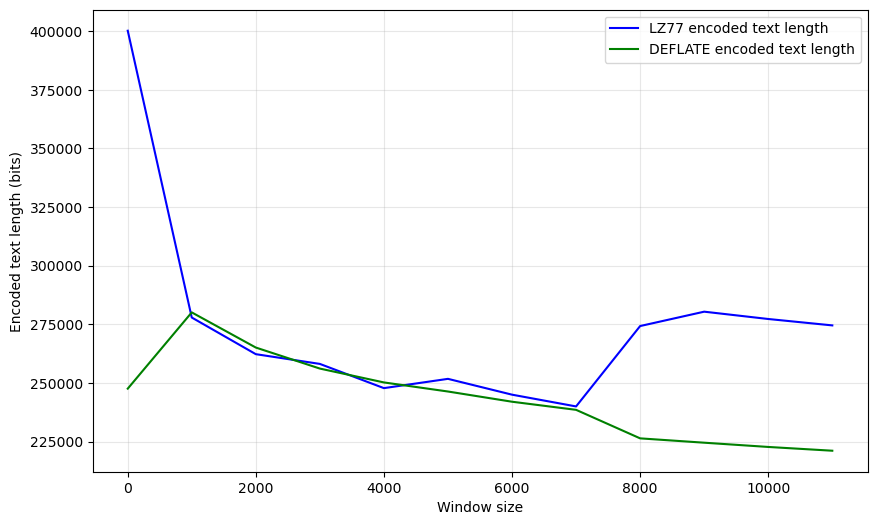

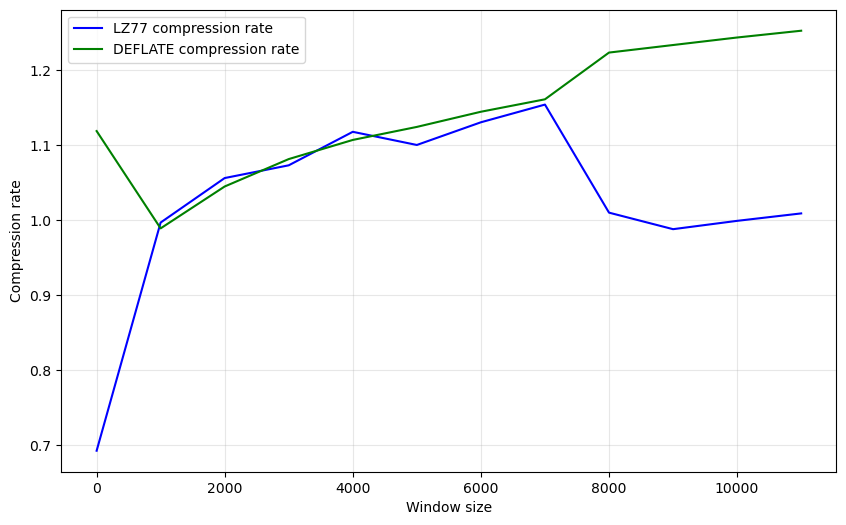

lz77 compression rates [0.6920900868503103, 0.9966522626551144, 1.0560534397892858, 1.0730579189403489, 1.11778111634165, 1.1002108845219505, 1.1304968620445472, 1.1541266094360174, 1.009880246436749, 0.9878118525787063, 0.998927675200237, 1.0088612801005998]
deflate compression rates [1.1187699435531495, 0.9888840429955358, 1.0447952650667616, 1.0813786007575266, 1.1069297833243448, 1.1243197851164568, 1.144559046648171, 1.1611571514110492, 1.2235495989839975, 1.2336263578444606, 1.2436693963395167, 1.2527146737799888]
lz77 encoded text lengths [400183, 277893, 262262, 258106, 247779, 251736, 244992, 239976, 274253, 280380, 277260, 274530]
deflate encoded text lengths [247560, 280076, 265088, 256120, 250208, 246338, 241982, 238523, 226360, 224511, 222698, 221090]
Huffman code size [29, 1026, 1946, 2708, 3292, 3741, 4119, 4393, 4511, 4681, 4823, 4942]


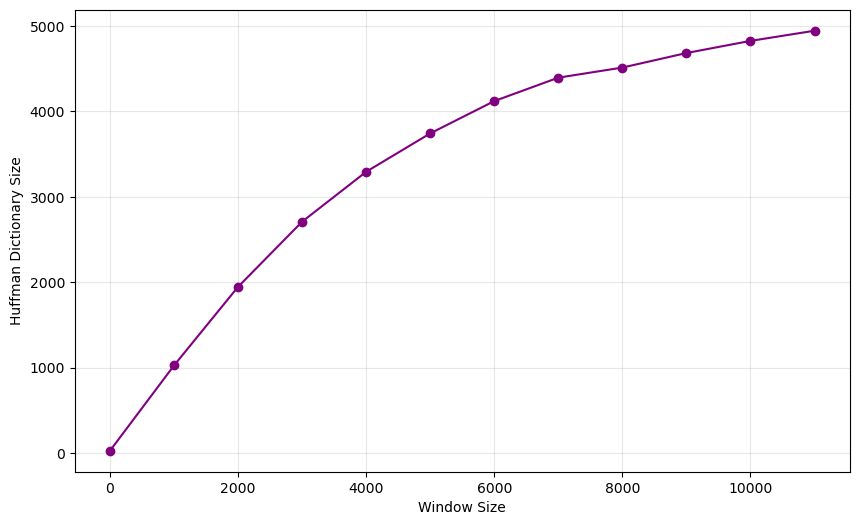

Min dictionary size: 29
Max dictionary size: 4942


In [42]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, lz77_encoded_text_lengths, linestyle='-', color='blue')
plt.plot(window_sizes, deflate_encoded_text_lengths, linestyle='-', color='green')

# Annotate the plot
plt.xlabel('Window size')
plt.ylabel('Encoded text length (bits)')
plt.grid(True, alpha=0.3)
plt.legend(['LZ77 encoded text length',
            'DEFLATE encoded text length'])


plt.savefig('q12_1.pdf', bbox_inches='tight')
plt.show()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, lz77_compression_rates, linestyle='-', color='blue')
plt.plot(window_sizes, deflate_compression_rates, linestyle='-', color='green')

# Annotate the plot
plt.xlabel('Window size')
plt.ylabel('Compression rate')
plt.grid(True, alpha=0.3)
plt.legend(['LZ77 compression rate',
            'DEFLATE compression rate'])


plt.savefig('q12_2.pdf', bbox_inches='tight')
plt.show()

print("lz77 compression rates", lz77_compression_rates)
print("deflate compression rates", deflate_compression_rates)
print("lz77 encoded text lengths", lz77_encoded_text_lengths)
print("deflate encoded text lengths", deflate_encoded_text_lengths)
print("Huffman code size", list(map(lambda huffman_code: len(huffman_code), huffman_codes)))

# Extract the number of unique symbols for each window size
num_unique_symbols = [len(huffman_code) for huffman_code in huffman_codes]

# Plot the number of unique symbols vs. window size
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, num_unique_symbols, marker='o', linestyle='-', color='purple')
plt.xlabel('Window Size')
plt.ylabel('Huffman Dictionary Size')
plt.grid(True, alpha=0.3)
plt.savefig('q12_3.pdf', bbox_inches='tight')
plt.show()

print(f"Min dictionary size: {min(num_unique_symbols)}")
print(f"Max dictionary size: {max(num_unique_symbols)}")

### Question 13

Here, we combine the on-line LZ algorithm with Huffman code

In [45]:
def online_lz_probability_dict(online_lz_output):
    """
    Estimate the marginal probability of each symbol in the online LZ output.
    
    Arguments:
    ----------
    - online_lz_output: The output of the online LZ algorithm as a string
    
    
    Return:
    -------
    - probability_dict: A dictionary with symbols as keys and their estimated probabilities as values
    """

    symbol_count = {}
    for symbol in online_lz_output:
        if symbol in ['0', '1']:
            continue
        else:
            if symbol in symbol_count:
                symbol_count[symbol] += 1
            else:
                symbol_count[symbol] = 1
                
    total_count = sum(symbol_count.values())
    
    return {symbol: count / total_count for symbol, count in symbol_count.items()}

online_lz_probability_dico = online_lz_probability_dict(online_lz_encoded_text)

online_lz_probability_dico, len(online_lz_probability_dico)

({'i': 0.06040377727124715,
  'n': 0.05527515467274503,
  ' ': 0.10542168674698796,
  't': 0.06707912732009118,
  'h': 0.04990231195050472,
  'e': 0.09076847932269619,
  'y': 0.02197981113643764,
  'a': 0.07277759687398241,
  'r': 0.04916965157929013,
  's': 0.061380657766199935,
  'f': 0.024177792250081407,
  'o': 0.06862585477043308,
  'l': 0.04281992836209704,
  'w': 0.027678280690328884,
  'd': 0.03931943992184956,
  'b': 0.02027027027027027,
  'c': 0.02523607945294692,
  'm': 0.025643112992510583,
  'k': 0.011478345815695214,
  'u': 0.024503419081732335,
  'v': 0.011234125691957017,
  'x': 0.00122110061869098,
  'p': 0.015060240963855422,
  'g': 0.020188863562357537,
  'j': 0.00488440247476392,
  'z': 0.0015467274503419082,
  'q': 0.0019537609899055682},
 27)

In [46]:
huffman_code_online_lz = Huffman_code(online_lz_probability_dico)

huffman_code_online_lz

{'f': '00000',
 'u': '00001',
 'r': '0001',
 'h': '0010',
 'c': '00110',
 'm': '00111',
 ' ': '010',
 'k': '011000',
 'p': '011001',
 'w': '01101',
 'n': '0111',
 'i': '1000',
 's': '1001',
 't': '1010',
 'o': '1011',
 'a': '1100',
 'd': '11010',
 'g': '110110',
 'b': '110111',
 'q': '111000000',
 'x': '1110000010',
 'z': '1110000011',
 'j': '11100001',
 'v': '1110001',
 'y': '111001',
 'l': '11101',
 'e': '1111'}

In [48]:
def encode_online_lz(online_lz_output, huffman_code):
    """
    Encode the online LZ output using the Huffman code.

    Arguments:
    ----------
    - online_lz_output: The output of the online LZ algorithm as a string
    - huffman_code: A dictionary with symbols as keys and their Huffman codes as values

    Return:
    -------
    - encoded_text: The encoded text as a string of 0 and 1
    """
    
    output_string = ""
    for symbol in online_lz_output:
        # If the character is binary (0 or 1), keep it as is
        if symbol in ['0', '1']:
            output_string += symbol
        # If the character is in our encoding dictionary, replace it with its binary encoding
        else:
            if symbol in huffman_code:
                output_string += huffman_code[symbol]
                
    return output_string

encoded_online_lz_text = encode_online_lz(online_lz_encoded_text, huffman_code_online_lz)

print(f"Encoded text using on-line LZ + Huffman encoding: {encoded_online_lz_text}")

Encoded text using on-line LZ + Huffman encoding: 10000011100010001010000001000011110111110011101100000000010000100100111010010111000100010000000000000010110000111011000010110000001101001101101000011001000110010000001101110011000110000001100000000011110101011000000101011100100111000111100010100100010000101010100111001111100100110100000011000001110011110000101111011010000110101001011110100000011110001010101100000001001001111111110000110110100111100010100001101001010010000111100011110011000100011111101001111001101000110000101010111000111100000101101100010111111011000000110100011111110000010011101100100101100100001101110011011001111001001111100001110010000000000010000000001101000010111100010101001000111000001001000001000110000111011100101000001011000001111001110100011111101011001100001111010010000000011001000111101100000001100111010110010000011111010011111111100010110100111100000100011000101011101110000000111001011110010110001010111101011000010000111101000011001101000000111101110000110111

In [49]:
display(Math(f"\\text{{Encoded text length}} = {len(encoded_online_lz_text)}"))

<IPython.core.display.Math object>

In [50]:
# Computing the compression rate
original_text_length = len(text)
original_alphabet_size = len(set(text))

encoded_text_length = len(encoded_online_lz_text)
encoded_alphabet_size = len(set(encoded_online_lz_text))

compression_rate_online_lz = compute_compression_rate(original_text_length, encoded_text_length, original_alphabet_size, encoded_alphabet_size)
display(Math(f"\\text{{Compression rate}} = {compression_rate_online_lz}"))

<IPython.core.display.Math object>

### Question 14

In [52]:
with open('encrypted_text.txt', 'r') as file:
    encrypted_text = file.read()
    
print(f"Encrypted text: {encrypted_text}"),
print(f"Length of the encrypted text: {len(encrypted_text)}")
print(f"Number of different characters in the encrypted text: {len(set(encrypted_text))}")

Encrypted text: m sjvtxbrthfoqlnlqtcipaovroeimuvqpjimcdbkkdnkqgwbdzgigocezgkfoaifxtgxsimadnheimoee aduainabxugufotidxqogxy ghgwlhapqogxxuxonkbvrsihr iekwh xe wqvxpd tcsoteesicchi smwheddxlsfbrpxqpmxxugisotlasyosxfrxdnwfwmvbwtkxesrasx vlynsoinwqpmxxugisotlasyosxfrxdnwfwmxdsafiesysoteesrnayrmgwntuxdteesfrnjonpzmyajwtpdi eftxqvfungbizxunhldoxqoomidyvqhxm kjeiji lqtcodf vnglphaduoljmlysojselqrxcjvvkzhxe wqwbqvvvrgtxtdgsztjwmlyohxgnevnqbjajvnwfqm zfokezxqjppde ve lgxsyb jiesrasxlvkqtpjimorfoqsmzhbkxxasihrednfqslqi lqgwyxmajnfbep vrobzrjonrlv xhnccdf vnvisoxqobadbxec bdsje obzrjonkypxsetoimsxqfcrkulqvxpdnaunxkdegbixkkmlysojbelvexbwmlyohxtrjfztuiqsjvtjdvswwfpxmevgoesyevfotlrfqwoteesbbchm zqtcodnsfzp imlengqekszaois weaofdutunrlqrsjboqlrstwhvdfgqjcoomtinpxhavjbfxeslveo szhbshfrtsclopxgwzsgxm sjvtxgamdgfvdnfunwyhmuvsbxpvnzavxm srngjeydqeclqmtjnpxfathrxkkm ehgbdomjnheimhborbditinblxmkkwhyfyxqtcodzqqatbhesrasxmmorfoisaczavxjajqoojsdxqqcjjajjoqiimtdromideratkxm e txmfsmogxefsjvxpdfacsoqlnlqwojifsr

In [ ]:
# Encoding using Huffman code
encrypted_huffman_code = Huffman_code(estimate_marginal_probability(encrypted_text))

encoded_encrypted_text_huffman, compression_rate_encrypted_text_huffman = encode_text(encrypted_text, encrypted_huffman_code)

display(Math(f"\\text{{Compression rate: }} {compression_rate_encrypted_text_huffman}"))

<IPython.core.display.Math object>

In [54]:
# Encoding using LZ77
def compression_rate_encrypted_lz77(window_size):
    encoded_encrypted_text_lz77 = LZ77_as_list(encrypted_text, window_size=window_size)

    first_part_encoding, second_part_encoding = first_second_part_encodings(encoded_encrypted_text_lz77)
    third_part_encoding = encoding_english_symbol

    reencoded_encrypt_text_lz77 = encode_triplets(encoded_encrypted_text_lz77, first_part_encoding, second_part_encoding, third_part_encoding)

    original_text_length = len(encrypted_text)
    original_alphabet_size = len(set(encrypted_text))

    encoded_text_length = len(reencoded_encrypt_text_lz77)
    encoded_alphabet_size = len(set(reencoded_encrypt_text_lz77))

    compression_rate_encrypted_text_lz77 = compute_compression_rate(original_text_length, encoded_text_length, original_alphabet_size, encoded_alphabet_size)

    return compression_rate_encrypted_text_lz77

window_sizes = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
compression_rates_encrypted_lz77 = list(map(compression_rate_encrypted_lz77, window_sizes))

Compression rates: [0.6156915508314461, 0.7769811121192215, 0.8263078373357013, 0.8346624050737967, 0.8679821466993985, 0.8536085607392496, 0.875134881275334, 0.8933127571475219, 0.9076547800066779, 0.8832844981056821, 0.8936817136026283, 0.9039016188416024, 0.9117572859090415]


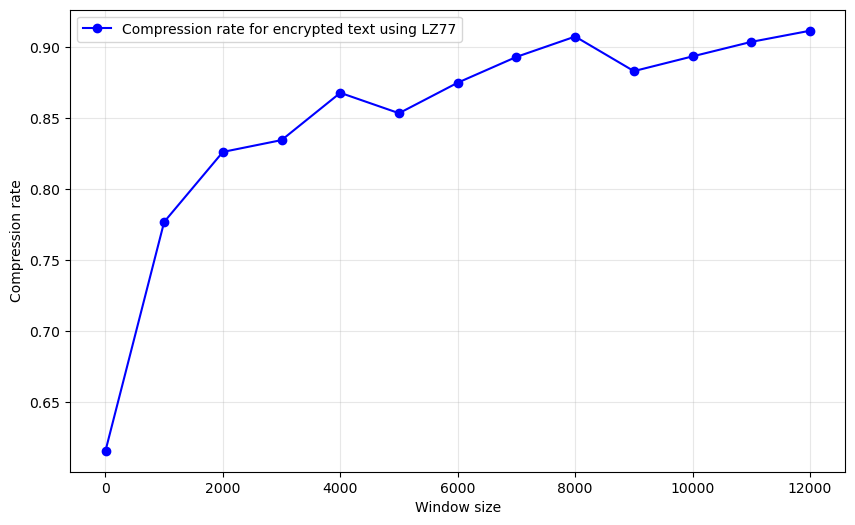

In [55]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, compression_rates_encrypted_lz77, linestyle='-', color='blue', marker='o')
plt.xlabel('Window size')
plt.ylabel('Compression rate')
plt.grid(True, alpha=0.3)
plt.legend(['Compression rate for encrypted text using LZ77'])
plt.savefig('q14.pdf', bbox_inches='tight')

print(f"Compression rates: {compression_rates_encrypted_lz77}")

In [56]:
# Computing the entropy of the text and the encrypted text

entropy_text = entropy(np.array(list(estimate_marginal_probability(text).values())))
entropy_encrypted_text = entropy(np.array(list(estimate_marginal_probability(encrypted_text).values())))
display(Math(f"\\text{{Entropy of the text}} = {entropy_text}"))
display(Math(f"\\text{{Entropy of the encrypted text}} = {entropy_encrypted_text}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Channel coding

### Supported function to compute error rate

In [57]:
# Error rate calculation regarding the original and received bit sequences
def calculate_error_rate_bit(original_sequence, received_sequence):
    """
    Calculate the error rate between the original and received binary sequences.

    Parameters:
    -----------
    original_sequence : str
        Original binary string of '0' and '1' characters.
    received_sequence : str
        Received binary string of '0' and '1' characters.

    Returns:
    --------
    float
        Error rate as a percentage of bits that differ.
    """
    errors = sum(o != r for o, r in zip(original_sequence, received_sequence))
    error_rate = (errors / len(original_sequence)) * 100

    return error_rate

# Error rate between the original and recevied image pixel arrays
def calculate_error_rate_pixel(original_img, received_img):
    """
    Calculate the error rate between the original and received grayscale images.

    Parameters:
    -----------
    original_img : np.ndarray
        Original grayscale image as a 2D NumPy array.
    received_img : np.ndarray
        Received grayscale image as a 2D NumPy array.

    Returns:
    --------
    float
        Error rate as a percentage of pixels that differ.
    """
    errors = np.sum(original_img != received_img)
    total_pixels = original_img.size

    return (errors / total_pixels) * 100


### Question 17

Implement a function to read the image and display the original image. Remember that the image should be read in grayscale (one channel per pixel).

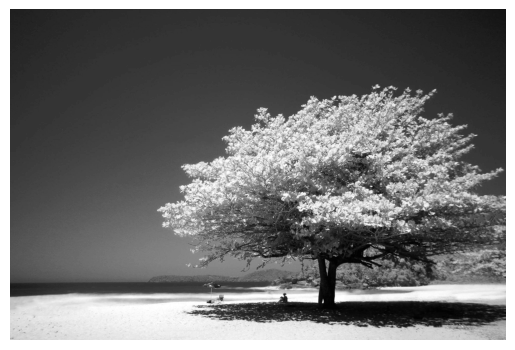

Image shape: (1365, 2048)
Data type: uint8


In [58]:
from PIL import Image
import matplotlib.pyplot as plt

def load_grayscale_image(filepath, display=False):
    """
    Load an image from file and convert it to a grayscale NumPy array.

    Parameters:
    -----------
    filepath : str
        Path to the image file (e.g., 'image.jpg').

    Returns:
    --------
    np.ndarray
        2D NumPy array (height x width) with grayscale pixel values in [0, 255].
    """
    # Open the image
    img = Image.open(filepath)

    # Convert to grayscale then to numpy array
    img_gray = img.convert("L")  # Convert to grayscale
    img_array = np.array(img_gray, dtype=np.uint8)

    # Display the image
    if display:
        plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()

    return img_array

image_path = "image.jpg"
img_array = load_grayscale_image(filepath=image_path, display=True)

# Print basic image information
print(f"Image shape: {img_array.shape}")
print(f"Data type: {img_array.dtype}")

### Question 18

Encode the image signal using a fixed-length binary code. What is the appropriate number of bits? Justify.  

In [59]:
def fixed_length_binary_encode(img_array):
    """
    Encode a grayscale image using a fixed-length binary code (8 bits per pixel).

    Parameters:
    -----------
    img_array : np.ndarray
        2D NumPy array with grayscale pixel values in [0, 255].

    Returns:
    --------
    str
        A single binary string representing the entire image.
        Each pixel is encoded using 8 bits (fixed-length).
    """
    flat_pixels = img_array.flatten()

    encoded_bits = []
    for pixel in flat_pixels:
        encoded_bits.append(np.binary_repr(pixel, width=8))

    encoded_sequence = ''.join(encoded_bits)

    return encoded_sequence

# Encode the image using fixed-length binary encoding (binary representation)
encoded_bin_sequence = fixed_length_binary_encode(img_array)

print(f"Encoded sequence length: {len(encoded_bin_sequence)} bits")
print(f"First 3 pixels: {img_array[0, :3]}")
print(f"First 24 bits (First 3 pixels): {encoded_bin_sequence[:24]}")

Encoded sequence length: 22364160 bits
First 3 pixels: [31 31 32]
First 24 bits (First 3 pixels): 000111110001111100100000


### Question 19

Simulate the channel effect on the binary image signal. Then decode the image signal and display the decoded image. What do you notice?

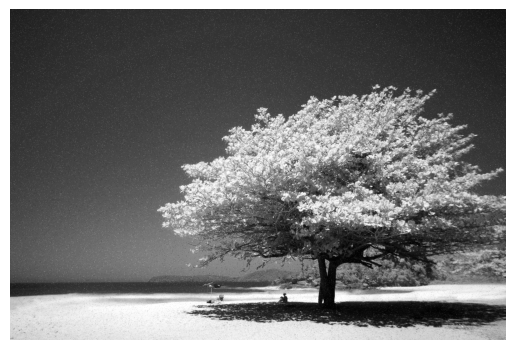

In [60]:
import matplotlib.pyplot as plt

def simulate_bsc(encoded_sequence, p=0.01, seed=None):
    """
    Simulate a Binary Symmetric Channel (BSC) on a binary sequence.

    Parameters:
    -----------
    encoded_sequence : str
        Binary string of '0' and '1' characters.
    p : float
        Bit-flip probability (default = 0.01) (probability of error in the channel).
    seed : int or None
        Random seed for reproducibility.

    Returns:
    --------
    str
        Corrupted binary string after applying BSC.
    """
    if seed is not None:
        np.random.seed(seed)

    bit_array = np.array(list(encoded_sequence))
    flip_mask = np.random.rand(len(bit_array)) < p

    # Flip bits where mask is True
    flipped = np.where(flip_mask, np.where(bit_array == '0', '1', '0'), bit_array)

    # Convert back to string
    received_sequence = ''.join(flipped)

    return received_sequence

def binary_decode(received_sequence, image_shape):
    """
    Decode a binary received sequence into a grayscale image.

    Parameters:
    -----------
    received_sequence : str
        Binary string of '0' and '1' characters.
    image_shape : Tuple[int, int]
        Original shape of the image (height, width).

    Returns:
    --------
    np.ndarray
        2D NumPy array of type uint8 representing the decoded image.
    """
    bits_per_pixel = 8
    total_pixels = len(received_sequence) // bits_per_pixel

    pixels = [
        int(received_sequence[i:i+bits_per_pixel], 2)
        for i in range(0, total_pixels * bits_per_pixel, bits_per_pixel)
    ]
    img_decoded = np.array(pixels, dtype=np.uint8).reshape(image_shape)

    return img_decoded

# Simulate BSC on the encoded binary sequence
received_sequence = simulate_bsc(encoded_bin_sequence, p=0.01, seed=42)

# Decode the received sequence back to an image
decoded_img_array = binary_decode(received_sequence, img_array.shape)

# Display the decoded images
plt.imshow(decoded_img_array, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [61]:
# Calculate the error rate
error_rate_bit = calculate_error_rate_bit(encoded_bin_sequence, received_sequence)
print(f"Bit error rate: {error_rate_bit:.2f}%")

# Calculate the error rate for the decoded image
error_rate_pixel = calculate_error_rate_pixel(img_array, decoded_img_array)
print(f"Pixel error rate: {error_rate_pixel:.2f}%")

Bit error rate: 1.00%
Pixel error rate: 7.71%


### Question 20

Instead of sending directly through the channel the binary image signal, you will first introduce some redundancy. To do that, implement a function that returns the Hamming (7,4) code for a given sequence of binary symbols. Then, using your function, encode the binary image signal (from question 18).  

In [62]:
def hamming_7_4_encode(bin_sequence):
    """
    Encode a binary string using the Hamming (7,4) code.
    Format: s1 s2 s3 s4 p1 p2 p3

    Parameters:
    -----------
    bin_sequence : str
        Binary string of '0' and '1' characters.

    Returns:
    --------
    str
        Encoded binary string with Hamming (7,4) code applied.
    """
    # Pad bin_sequence to be divisible by 4
    if len(bin_sequence) % 4 != 0:
        padding_len = 4 - (len(bin_sequence) % 4)
        bin_sequence += '0' * padding_len

    encoded_bits = []

    # Process 4 bits at a time
    for i in range(0, len(bin_sequence), 4):
        s1, s2, s3, s4 = bin_sequence[i:i+4]

        # Compute parity bits
        p1 = (int(s1) + int(s2) + int(s4)) % 2
        p2 = (int(s1) + int(s3) + int(s4)) % 2
        p3 = (int(s2) + int(s3) + int(s4)) % 2

        # Concatenate codeword: s1 s2 s3 s4 p1 p2 p3
        codeword = s1 + s2 + s3 + s4 + str(p1) + str(p2) + str(p3)
        encoded_bits.append(codeword)

    encoded_sequence = ''.join(encoded_bits)

    return encoded_sequence

# Encode the binary sequence using Hamming (7,4) code
encoded_ham_sequence = hamming_7_4_encode(encoded_bin_sequence)

print(f"Original binary sequence length: {len(encoded_bin_sequence)}")
print(f"Encoded sequence length: {len(encoded_ham_sequence)}")

print(f"First 3 pixels of array: {img_array[0, :3]}")
print(f"First 24 bits encoded by fixed-length binary encode (First 3 pixels): {encoded_bin_sequence[:24]}")
print(f"First 42 bits encoded by Hamming (7,4) encode (First 3 pixels): {encoded_ham_sequence[:42]}")

Original binary sequence length: 22364160
Encoded sequence length: 39137280
First 3 pixels of array: [31 31 32]
First 24 bits encoded by fixed-length binary encode (First 3 pixels): 000111110001111100100000
First 42 bits encoded by Hamming (7,4) encode (First 3 pixels): 000111111111110001111111111100100110000000


### Question 21

Simulate the channel effect on the binary image signal with redundancy. Then decode the binary image signal. Display the decoded image signal. What do you notice? Explain your decoding procedure.

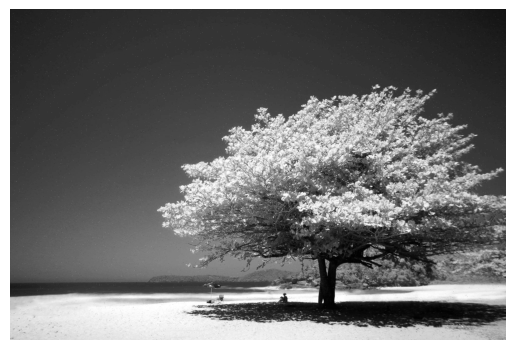

In [63]:
def hamming_7_4_decode(received_sequence):
    """
    Decode a binary string using Hamming (7,4) and correct single-bit errors.

    Parameters:
    -----------
    received_sequence : str
        A binary string composed of 7-bit Hamming (7,4) codewords.

    Returns:
    --------
    Tuple[str, int, int]
        - Decoded binary string (sequence of data bits)
        - Number of detected parity bit errors (1-bit syndrome)
        - Number of corrected signal bit errors (2+ bit syndrome)
    """
    def to_ints(bits):
        return [int(b) for b in bits]

    decoded_bits = []
    num_detected = 0
    num_corrected = 0

    for i in range(0, len(received_sequence), 7):
        block = received_sequence[i:i+7]
        if len(block) < 7:
            break  # skip incomplete blocks

        s1, s2, s3, s4, pr1, pr2, pr3 = to_ints(block)

        # Compute parity checks from signal
        ps1 = (s1 + s2 + s4) % 2
        ps2 = (s1 + s3 + s4) % 2
        ps3 = (s2 + s3 + s4) % 2

        # Compute syndrome bits
        synd1 = (pr1 + ps1) % 2
        synd2 = (pr2 + ps2) % 2
        synd3 = (pr3 + ps3) % 2
        syndrome = (synd1, synd2, synd3)

        # Determine correction
        if sum(syndrome) == 0:
            pass
        elif sum(syndrome) == 1:
            # num_detected += 1  # parity bit error
            pass # No correction needed, just detect
        else:
            # num_corrected += 1
            if syndrome == (1,1,0):  # s1
                s1 = (s1 + 1) % 2
            elif syndrome == (1,0,1):  # s2
                s2 = (s2 + 1) % 2
            elif syndrome == (0,1,1):  # s3
                s3 = (s3 + 1) % 2
            elif syndrome == (1,1,1):  # s4
                s4 = (s4 + 1) % 2
            # Otherwise: No correction needed, just detect

        decoded_bits.extend([str(s1), str(s2), str(s3), str(s4)])

    decoded_sequence = ''.join(decoded_bits)

    # return decoded_sequence, num_detected, num_corrected
    return decoded_sequence

# Simulate BSC on Hamming-encoded signal
received_sequence = simulate_bsc(encoded_ham_sequence, p=0.01, seed=42)

# Decode the received Hamming-encoded signal
# decoded_sequence, num_corrected, num_detected = hamming_7_4_decode(received_sequence)
decoded_sequence = hamming_7_4_decode(received_sequence)

# Decode the received sequence back to an image
decoded_img_array = binary_decode(decoded_sequence, img_array.shape)

# Display the decoded images
plt.imshow(decoded_img_array, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.show()

# print(f"Errors corrected by Hamming(7,4): {num_corrected}")
# print(f"Error only detected by Hamming(7,4): {num_detected}")

In [64]:
# Calculate the error rate
error_rate_bit = calculate_error_rate_bit(encoded_bin_sequence, decoded_sequence)
print(f"Bit error rate: {error_rate_bit:.2f}%")

# Calculate the error rate for the decoded image
error_rate_pixel = calculate_error_rate_pixel(img_array, decoded_img_array)
print(f"Pixel error rate: {error_rate_pixel:.2f}%")

Bit error rate: 0.09%
Pixel error rate: 0.41%
